>WARNING:
Reducing dimensionality does cause some information loss, just like compressing an
image to JPEG can degrade its quality, so even though it will speed up training, it may
make your system perform slightly worse. It also makes your pipelines a bit more
complex and thus harder to maintain. Therefore, I recommend you first try to train your
system with the original data before considering using dimensionality reduction. In
some cases, reducing the dimensionality of the training data may filter out some noise
and unnecessary details and thus result in higher performance, but in general it won’t; it
will just speed up training.


1) how can two points be so far apart when they both lie within the same unit
hypercube? Well, there’s just plenty of space in high dimensions. As a
result, high-dimensional datasets are at risk of being very sparse: most
training instances are likely to be far away from each other. This also means
that a new instance will likely be far away from any training instance,
making predictions much less reliable than in lower dimensions, since they
will be based on much larger extrapolations. In short, the more dimensions
the training set has, the greater the risk of overfitting it.

2) In theory, one solution to the curse of dimensionality could be to increase
the size of the training set to reach a sufficient density of training instances.
Unfortunately, in practice, the number of training instances required to
reach a given density grows exponentially with the number of dimensions.

>NOTE: With just 100 features—significantly fewer than in the MNIST problem—
all ranging from 0 to 1, you would need more training instances than atoms
in the observable universe in order for training instances to be within 0.1 of
each other on average, assuming they were spread out uniformly across all
dimensions.




In [7]:
# generate 3d dataset

import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

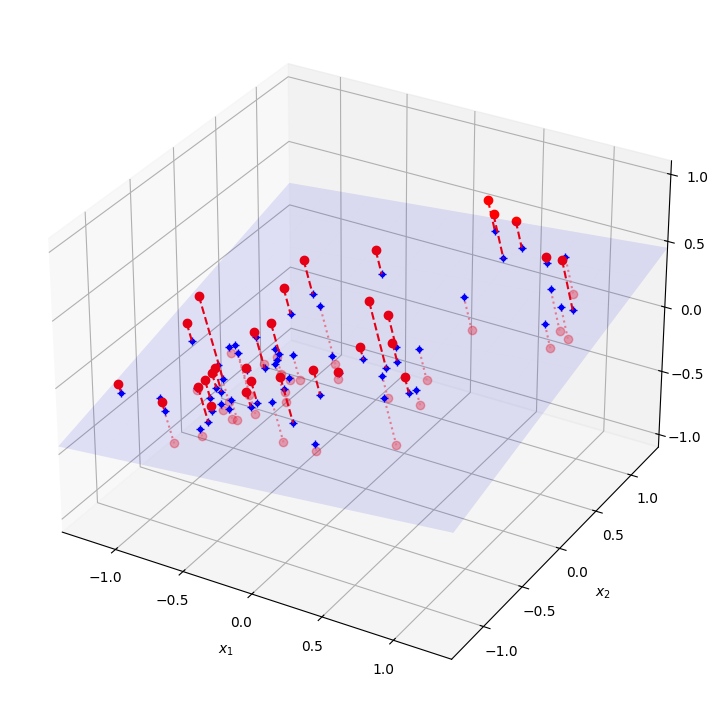

In [8]:
#Figure 8–2

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # dataset reduced to 2D
X3D_inv = pca.inverse_transform(X2D)  # 3D position of the projected samples
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # projection plane coefs
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # plane
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # samples above plane
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # samples below plane

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# plot samples and projection lines below plane first
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # projection plane
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # projected samples
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# now plot projection lines and samples above plane
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

plt.show()

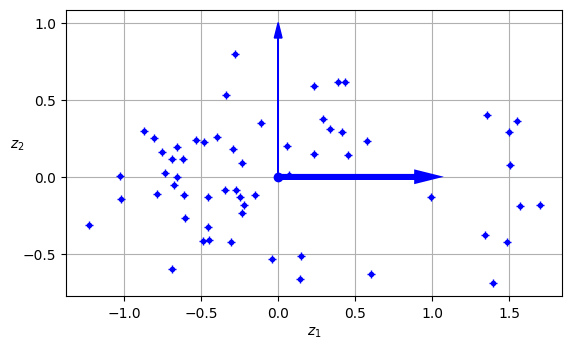

In [5]:
# Figure 8–3

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)

In [1]:
# load swiss roll dataset
from sklearn.datasets import make_swiss_roll
X_swiss,t = make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)


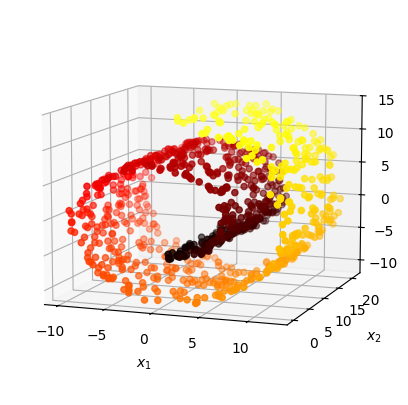

In [9]:
# figure 8-4:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0,0.8,256)))

axes = [-11.5,14,-2,23,-12,15]

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111,projection="3d")

ax.scatter(X_swiss[:,0],X_swiss[:,1],X_swiss[:,2],c=t,cmap=darker_hot)
ax.view_init(10,-70)
set_xyz_axes(ax,axes)
plt.show()

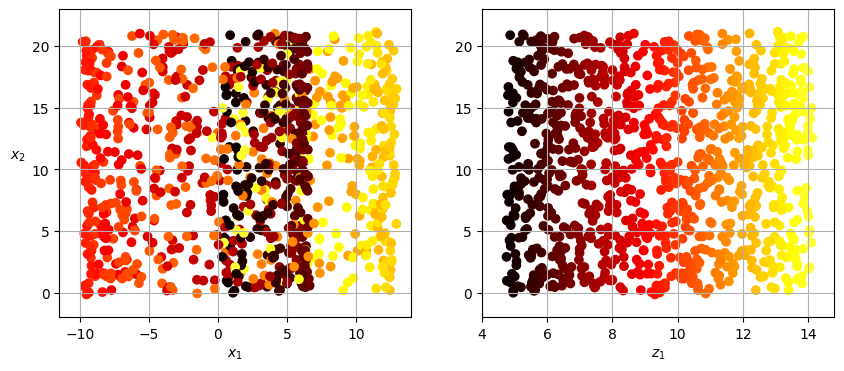

In [12]:
# Figure 8–5

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X_swiss[:, 0], X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", labelpad=10, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis([4, 14.8, axes[2], axes[3]])
plt.xlabel("$z_1$")
plt.grid(True)

plt.show()

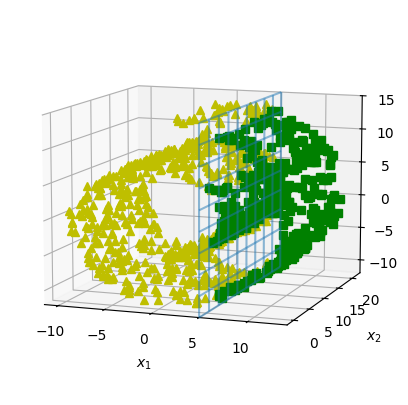

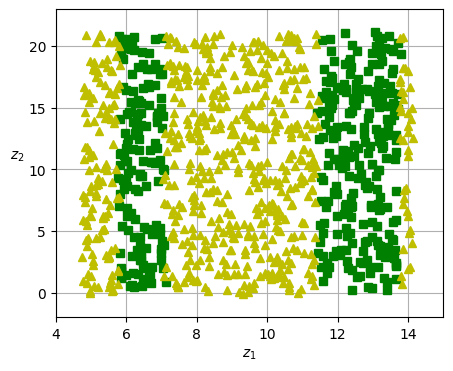

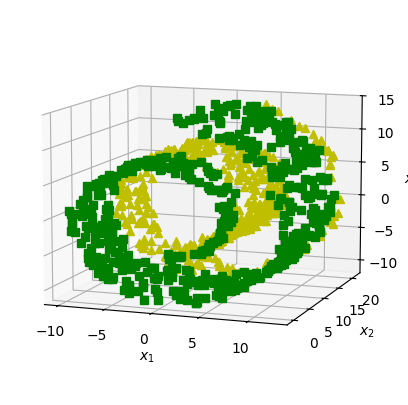

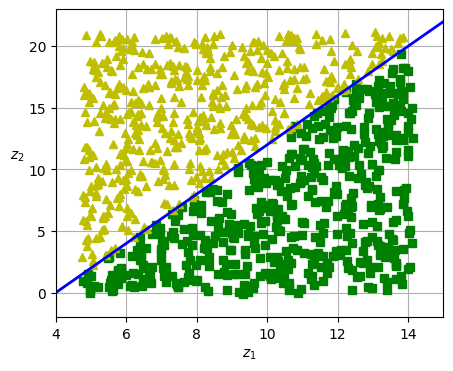

In [13]:
# Figure 8–6
    
axes = [-11.5, 14, -2, 23, -12, 15]
x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

positive_class = X_swiss[:, 0] > 5
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
set_xyz_axes(ax, axes)
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
plt.show()

positive_class = 2 * (t[:] - 4) > X_swiss[:, 1]
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel("$x_1$", rotation=0)
ax.set_ylabel("$x_2$", rotation=0)
ax.set_zlabel("$x_3$", rotation=0)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.plot([4, 15], [0, 22], "b-", linewidth=2)
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
plt.show()

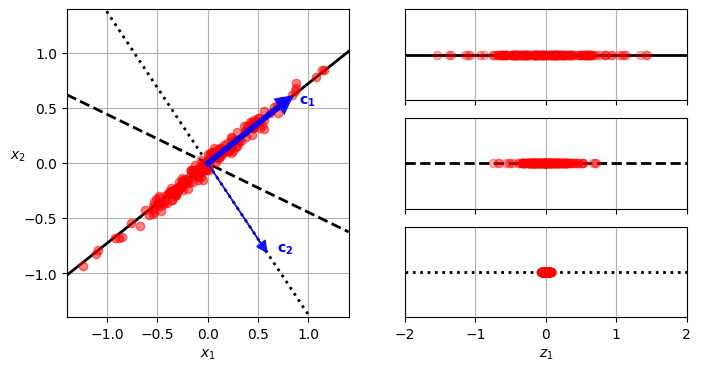

In [14]:
# Figure 8–7

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X_line = np.random.randn(m, 2) / 10
X_line = X_line @ np.array([[stretch, 0], [0, 1]])  # stretch
X_line = X_line @ [[np.cos(angle), np.sin(angle)],
                   [np.sin(angle), np.cos(angle)]]  # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi / 6), np.sin(angle - 2 * np.pi / 6)])
u3 = np.array([np.cos(angle - np.pi / 2), np.sin(angle - np.pi / 2)])

X_proj1 = X_line @ u1.reshape(-1, 1)
X_proj2 = X_line @ u2.reshape(-1, 1)
X_proj3 = X_line @ u3.reshape(-1, 1)

plt.figure(figsize=(8, 4))
plt.subplot2grid((3, 2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4 * u1[1] / u1[0], 1.4 * u1[1] / u1[0]], "k-",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u2[1] / u2[0], 1.4 * u2[1] / u2[0]], "k--",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u3[1] / u3[0], 1.4 * u3[1] / u3[0]], "k:",
         linewidth=2)
plt.plot(X_line[:, 0], X_line[:, 1], "ro", alpha=0.5)
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=4, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=1, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", color="blue")
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.grid()

plt.subplot2grid((3, 2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=2)
plt.plot(X_proj1[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=2)
plt.plot(X_proj2[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$")
plt.grid()

plt.show()

# Approaches for Reducing Dimensionality:

1) Projection:

>Rule: In most real-world problems, training instances are not spread out
uniformly across all dimensions. Many features are almost constant, while
others are highly correlated (as discussed earlier for MNIST). As a result,
all training instances lie within (or close to) a much lower-dimensional
subspace of the high-dimensional space.

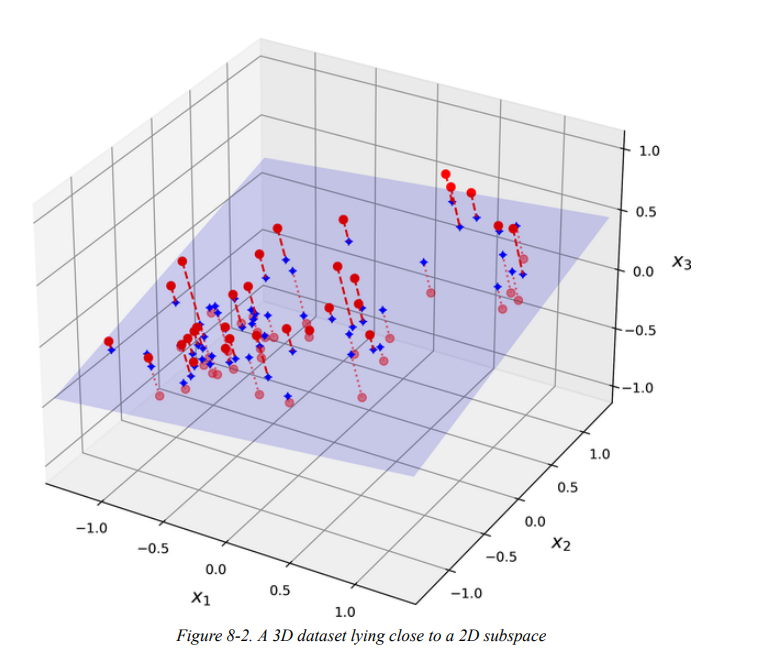

Note that the axes
correspond to new features z and z : they are the coordinates of the
projections on the plane.

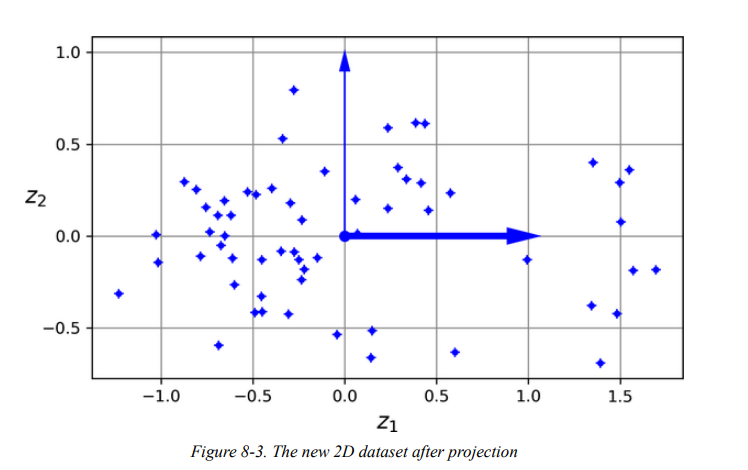

2) Manifold Learning:

>assumption 1: most real-world high-dimensional datasets lie close to a much
lower-dimensional manifold. This assumption is very often empirically
observed.

>assumption 2: the task at hand (e.g., classification or regression) will be
simpler if expressed in the lower-dimensional space of the manifold.

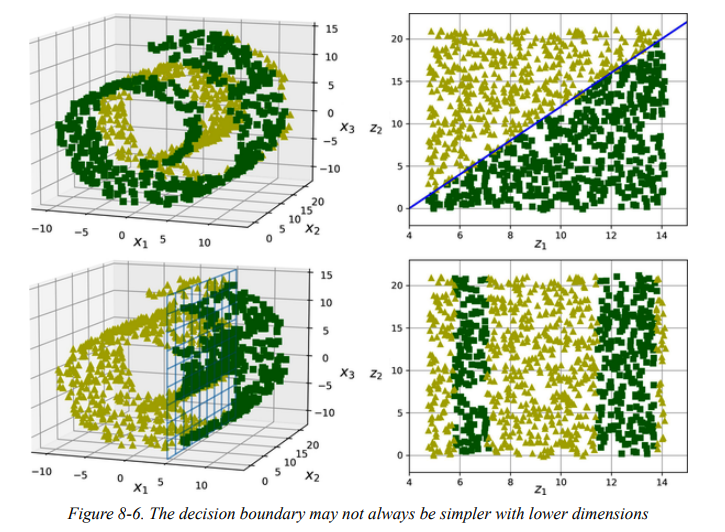

> The Swiss roll is an example of a 2D manifold. Put simply, a 2D manifold is
a 2D shape that can be bent and twisted in a higher-dimensional space.
More generally, a d-dimensional manifold is a part of an n-dimensional
space (where d < n) that locally resembles a d-dimensional hyperplane. In
the case of the Swiss roll, d = 2 and n = 3: it locally resembles a 2D plane,
but it is rolled in the third dimension.

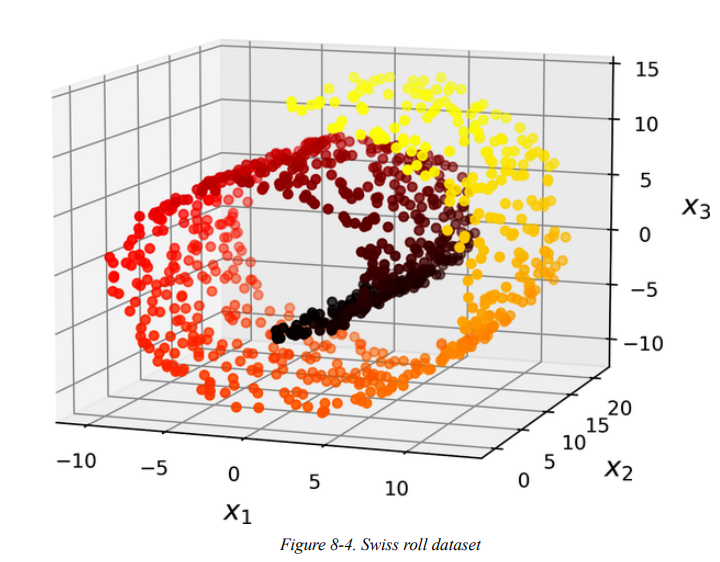

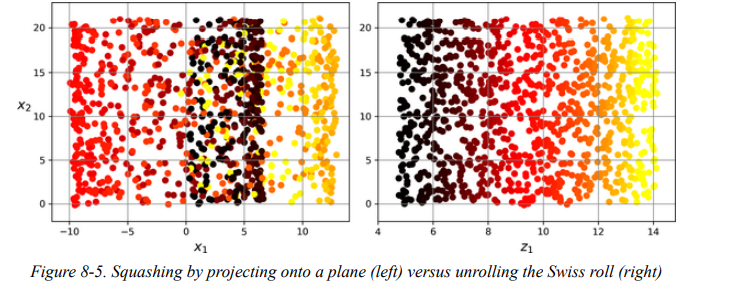






# PCA( Principal componenet analysis)

1) First it identifies the hyperplane that
lies closest to the data & preserves the most variance, and then it projects the data onto it.

2) 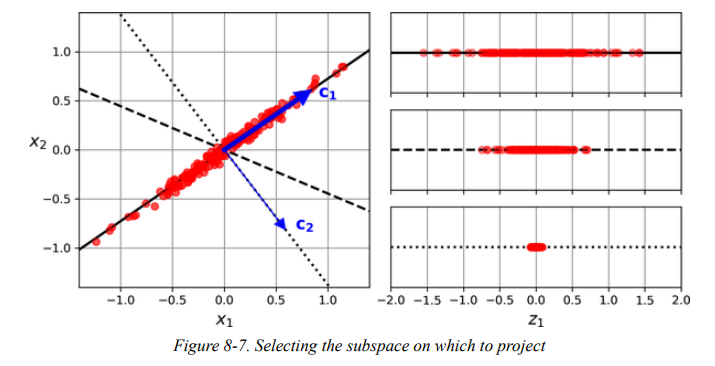
It seems reasonable to select the axis that preserves the maximum amount
of variance, as it will most likely lose less information than the other
projections. Another way to justify this choice is that it is the axis that
minimizes the mean squared distance between the original dataset and its
projection onto that axis. This is the rather simple idea behind PCA.

3) Principal components:
>The i axis is called the i principal component (PC) of the data. In
Figure 8-7, the first PC is the axis on which vector c lies, and the second
PC is the axis on which vector c lies. In Figure 8-2 the first two PCs are on
the projection plane, and the third PC is the axis orthogonal to that plane.
After the projection, in Figure 8-3, the first PC corresponds to the z_1 axis,
and the second PC corresponds to the z_2 axis.

>NOTE:
For each principal component, PCA finds a zero-centered unit vector pointing in the
direction of the PC. Since two opposing unit vectors lie on the same axis, the direction
of the unit vectors returned by PCA is not stable: if you perturb the training set slightly
and run PCA again, the unit vectors may point in the opposite direction as the original
vectors. However, they will generally still lie on the same axes. In some cases, a pair of
unit vectors may even rotate or swap (if the variances along these two axes are very
close), but the plane they define will generally remain the same.

>So how can you find the principal components of a training set? Luckily,
there is a standard matrix factorization technique called singular value
decomposition (SVD) that can decompose the training set matrix X into the
matrix multiplication of three matrices U Σ V , where V contains the unit
vectors that define all the principal components that you are looking for, as
shown in Equation :

$$
V = \begin{pmatrix}
| & | & & | \\
c_1 & c_2 & \cdots & c_n \\
| & | & & |
\end{pmatrix}
$$




In [3]:
"""The following Python code uses NumPy's svd() function to obtain all the
principal components of the 3D training set represented in Figure 8-2, then
it extracts the two unit vectors that define the first two PCs:"""

import numpy as np
X=np.array([
    [-2.50919762, -9.58831011,  2.23705789],
    [ 9.01428613,  9.39819704, -7.21012279],
    [ 4.63987884,  6.64885282, -4.15710703],
    [ 1.97316968, -5.75321779, -2.67276313],
    [-6.87962719, -6.36350066, -0.87860032],
    [-6.88010959, -6.3319098 ,  5.70351923],
    [-8.83832776, -3.91515514, -6.00652436],
    [ 7.32352292,  0.49512863,  0.28468877],
    [ 2.02230023, -1.36109963,  1.84829138],
    [ 4.16145156, -4.1754172 , -9.07099175]
])
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]

> WARNING:
PCA assumes that the dataset is centered around the origin. As you will see, ScikitLearn’s PCA classes take care of centering the data for you. If you implement PCA
yourself (as in the preceding example), or if you use other libraries, don’t forget to
center the data first.

4) Projecting Down to d Dimensions:
>Once you have identified all the principal components, you can reduce the
dimensionality of the dataset down to d dimensions by projecting it onto the
hyperplane defined by the first d principal components. Selecting this
hyperplane ensures that the projection will preserve as much variance as
possible. For example, in Figure 8-2 the 3D dataset is projected down to the
2D plane defined by the first two principal components, preserving a large
part of the dataset’s variance. As a result, the 2D projection looks very
much like the original 3D dataset.

>To project the training set onto the hyperplane and obtain a reduced dataset
X of dimensionality d, compute the matrix multiplication of the training set matrix X by the matrix W_d , defined as the matrix containing the
first d columns of V, as shown in Equation 8-2.

$$
X_{d\text{-proj}} = X W_d
$$





In [4]:
# projecting training set onto the plane defined by the first 2 PCs:
W2  = Vt[:2].T
X2D = X_centered @ W2

In [5]:
# Using Scikit-learn:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

""" its components_ attribute
holds the transpose of W_d : it contains one row for each of the first d
principal components.
"""



' its components_ attribute\nholds the transpose of W : it contains one row for each of the first d\nprincipal components.\n'

5) Explained Variance Ratio:

> The ratio indicates the proportion of the dataset’s variance that lies
along each principal component.

In [6]:
# explained variance ratios of 1st two components of the 3d dataset.
pca.explained_variance_ratio_

"""This output tells us that about 72% of the dataset’s variance lies along the
first PC, and about 17% lies along the second PC. This leaves about 12% for
the third PC, so it is reasonable to assume that the third PC probably carries
little information.
"""

array([0.72115035, 0.16932261])

6) Choosing the Right Number of Dimensions:
> Instead of arbitrarily choosing the number of dimensions to reduce down to,
it is simpler to choose the number of dimensions that add up to a
sufficiently large portion of the variance—say, 95% (An exception to this
rule, of course, is if you are reducing dimensionality for data visualization,
in which case you will want to reduce the dimensionality down to 2 or 3).

In [16]:
"""The following code loads and splits the MNIST dataset (introduced in
Chapter 3) and performs PCA without reducing dimensionality, then
computes the minimum number of dimensions required to preserve 95% of
the training set's variance"""

from sklearn.datasets import fetch_openml
mnist  = fetch_openml('mnist_784',version=1)
X_train,y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test,y_test = mnist.data[60_000:], mnist.target[60_000:]

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 # d equals 154


In [17]:
"""You could then set n_components=d and run PCA again, but there’s a better
option. Instead of specifying the number of principal components you want
to preserve, you can set n_components to be a float between 0.0 and 1.0,
indicating the ratio of variance you wish to preserve"""
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

154

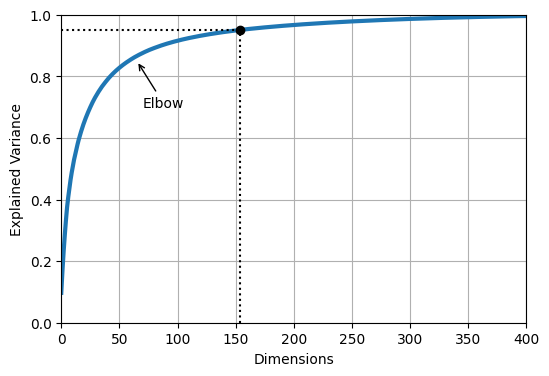

In [18]:
# Figure 8–8

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

> Yet another option is to plot the explained variance as a function of the
number of dimensions (simply plot cumsum; see Figure 8-8). There will
usually be an elbow in the curve, where the explained variance stops
growing fast. In this case, you can see that reducing the dimensionality
down to about 100 dimensions wouldn’t lose too much explained variance.




In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf = make_pipeline(
    PCA(random_state=42),
    RandomForestClassifier(random_state=42)
)

param = {
    "pca__n_components": np.arange(10,80),
    "randomforestclassifier__n_estimators": np.arange(50,500)
}

rnd_search = RandomizedSearchCV(clf,
                                param,
                                n_iter=10,
                                cv=3,
                                random_state=42)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [15]:
X_reduced = rnd_search.fit(X_train[:10_000],y_train[:10_000])

In [13]:
# 784 dimensions reduced to 64 with PCA and random forest
rnd_search.best_params_


{'randomforestclassifier__n_estimators': 304, 'pca__n_components': 62}

# PCA for Compression:
1) The mean squared distance between the original
data and the reconstructed data (compressed and then decompressed) is
called the reconstruction error.


In [32]:
# The inverse_transform() method lets us decompress the reduced
# MNIST dataset back to 784 dimensions
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_reduced = pca.fit_transform(X_train,y_train)
X_recovered = pca.inverse_transform(X_reduced)


In [34]:
X_train_np = X_train.to_numpy()

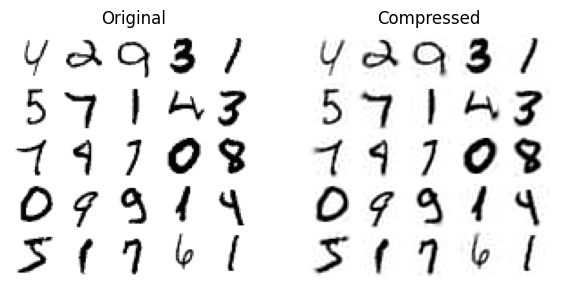

In [36]:
# extra code – this cell generates and saves Figure 8–9

plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train_np[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")


# Insights:
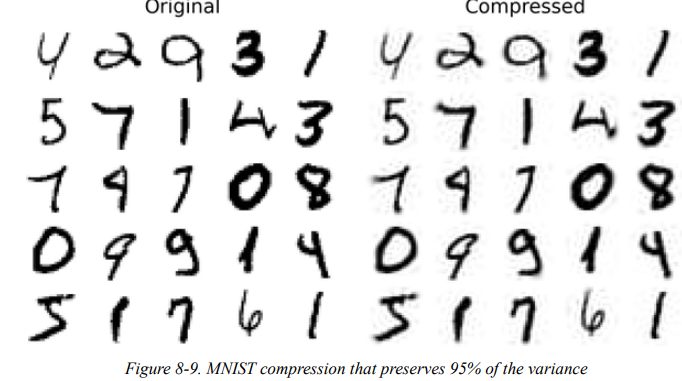


>PCA inverse transformation, back to the original no. of dimensions.
$$
X_{\text{recovered}} = X_{d\text{-proj}} W_d^\top
$$


# Randomized PCA:
1) If you set the svd_solver hyperparameter to "randomized", Scikit-Learn
uses a stochastic algorithm called randomized PCA that quickly finds an
approximation of the first d principal components. Its computational
complexity is O(m × d^2 ) + O(d^3 ), instead of O(m × n^2 ) + O(n^3 ) for the full
SVD approach, so it is dramatically faster than full SVD when d is much
smaller than n.

>TIP:
By default, svd_solver is actually set to "auto": Scikit-Learn automatically uses the
randomized PCA algorithm if max(m, n) > 500 and n_components is an integer smaller
than 80% of min(m, n), or else it uses the full SVD approach. So the preceding code
would use the randomized PCA algorithm even if you removed the
svd_solver="randomized" argument, since 154 < 0.8 × 784. If you want to force
Scikit-Learn to use full SVD for a slightly more precise result, you can set the
svd_solver hyperparameter to "full".


In [16]:
rnd_pca = PCA(n_components=154,
              svd_solver="randomized",
              random_state=42)

X_reduced = rnd_pca.fit_transform(X_train)

# Incremental PCA:
1) One problem with the preceding implementations of PCA is that they
require the whole training set to fit in memory in order for the algorithm to
run. Fortunately, incremental PCA (IPCA) algorithms have been developed
that allow you to split the training set into mini-batches and feed these in
one mini-batch at a time. This is useful for large training sets and for
applying PCA online (i.e., on the fly, as new instances arrive).

>The following code splits the MNIST training set into 100 mini-batches
(using NumPy’s array_split() function) and feeds them to Scikit-Learn’s
IncrementalPCA class to reduce the dimensionality of the MNIST dataset
down to 154 dimensions, just like before. Note that you must call the
partial_fit() method with each mini-batch, rather than the fit()
method with the whole training set



In [23]:
from sklearn.decomposition import IncrementalPCA
# X_train = X_train.values //convert to np
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train,n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [32]:
"""Alternatively, you can use NumPy's memmap class, which allows you to
manipulate a large array stored in a binary file on disk as if it were entirely
in memory; the class loads only the data it needs in memory, when it needs
it. To demonstrate this, let's first create a memory-mapped (memmap) file
and copy the MNIST training set to it, then call flush() to ensure that any
data still in the cache gets saved to disk. In real life, X_train would
typically not fit in memory, so you would load it chunk by chunk and save
each chunk to the right part of the memmap array"""


filename = "my_mnist.mmap"
X_mmap = np.memmap(filename,dtype='float32',mode='w+',
shape = X_train.shape)
X_mmap[:] = X_train # could be a loop instead, saving the data chunk by chunk
X_mmap.flush()



In [33]:
"""Next, we can load the memmap file and use it like a regular NumPy array.
Let’s use the IncrementalPCA class to reduce its dimensionality. Since this
algorithm uses only a small part of the array at any given time, memory
usage remains under control. This makes it possible to call the usual fit()
method instead of partial_fit(), which is quite convenient"""

X_mmap = np.memmap(filename,dtype='float32',mode='readonly').reshape(-1,784)
batch_size  = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154,batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

>WARNING:
Only the raw binary data is saved to disk, so you need to specify the data type and shape
of the array when you load it. If you omit the shape, np.memmap() returns a 1D array.

# Conclusion: 
For very high-dimensional datasets, PCA can be too slow. As you saw
earlier, even if you use randomized PCA its computational complexity is
still O(m × d^2 ) + O(d^3 ), so the target number of dimensions d must not be
too large. If you are dealing with a dataset with tens of thousands of
features or more (e.g., images), then training may become much too slow:
in this case, you should consider using random projection instead.

# Random Projection:

1) , the random projection algorithm projects the data to a
lower-dimensional space using a random linear projection. 

2) , the more dimensions you drop, the more information is lost, and
the more distances get distorted. So how can you choose the optimal
number of dimensions? an
equation that determines the minimum number of dimensions to preserve in
order to ensure—with high probability—that distances won’t change by
more than a given tolerance(epsilon). 

3) Notice that the equation does not use n(total features), it only
relies on m(total instances) and (tolerance)ε. This equation is implemented by the
johnson_lindenstrauss_min_dim() function.

In [34]:

"""a dataset containing
m = 5,000 instances with n = 20,000 features each, and you don’t want the
squared distance between any two instances to change by more than ε =
10%, then you should project the data down to d dimensions, with d ≥ 4
log(m) / (½ ε² - ⅓ ε³), which is 7,300 dimensions."""
from sklearn.random_projection import johnson_lindenstrauss_min_dim
m, epsilon = 5_000,0.1
d = johnson_lindenstrauss_min_dim(m,eps=epsilon)
d

7300

In [38]:
"""Now we can just generate a random matrix P of shape [d, n], where each
item is sampled randomly from a Gaussian distribution with mean 0 and
variance 1 / d, and use it to project a dataset from n dimensions down to d"""

n = 20_000
np.random.seed(42)
P = np.random.randn(d,n) / np.sqrt(d) # std dev = square root of variance

X = np.random.randn(m,n) #generate a fake dataset
X_reduced = X @ P.T

>That’s all there is to it! It’s simple and efficient, and no training is required:
the only thing the algorithm needs to create the random matrix is the
dataset’s shape. The data itself is not used at all.


In [39]:
"""Scikit-Learn offers a GaussianRandomProjection class to do exactly what
we just did: when you call its fit() method, it uses
johnson_lindenstrauss_min_dim() to determine the output
dimensionality, then it generates a random matrix, which it stores in the
components_ attribute. Then when you call transform(), it uses this
matrix to perform the projection. When creating the transformer, you can
set eps if you want to tweak ε (it defaults to 0.1), and n_components if you
want to force a specific target dimensionality d. """

from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps=epsilon,random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X)

4) Scikit-Learn also provides a second random projection transformer, known
as SparseRandomProjection. It determines the target dimensionality in the
same way, generates a random matrix of the same shape, and performs the
projection identically. The main difference is that the random matrix is
sparse. This means it uses much less memory: about 25 MB instead of
almost 1.2 GB in the preceding example!
it enjoys the same
distance-preserving property as the previous approach, and the quality of the dimensionality reduction is comparable. In short, it’s usually preferable
to use this transformer instead of the first one, especially for large or sparse
datasets.

5) The ratio r of nonzero items in the sparse random matrix is called its
density. By default, it is equal to 1/√n. With 20,000 features, this means
that only 1 in ~141 cells in the random matrix is nonzero: that’s quite
sparse! You can set the density hyperparameter to another value if you
prefer. Each cell in the sparse random matrix has a probability r of being
nonzero, and each nonzero value is either –v or +v (both equally likely),
where v = 1/√dr.




In [40]:
"""If you want to perform the inverse transform, you first need to compute the
pseudo-inverse of the components matrix using SciPy’s pinv() function,
then multiply the reduced data by the transpose of the pseudo-inverse"""
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)
X_recovered = X_reduced @ components_pinv.T

>WARNING:
Computing the pseudo-inverse may take a very long time if the components matrix is
large, as the computational complexity of pinv() is O(dn²) if d < n, or O(nd²)
otherwise.

>NOTE:
Random projection is not always used to reduce the dimensionality of large datasets. For
example, a 2017 paper by Sanjoy Dasgupta et al. showed that the brain of a fruit fly
implements an analog of random projection to map dense low-dimensional olfactory
inputs to sparse high-dimensional binary outputs: for each odor, only a small fraction of
the output neurons get activated, but similar odors activate many of the same neurons.
This is similar to a well-known algorithm called locality sensitive hashing (LSH), which
is typically used in search engines to group similar documents.



# LLE (Locally linear embedding):
1) Nonlinear dims reduction technique & manifold learning technique. LLE works
by first measuring how each training instance linearly relates to its nearest
neighbors, and then looking for a low-dimensional representation of the
training set where these local relationships are best preserved. This approach makes it particularly good at unrolling twisted
manifolds, especially when there is not too much noise.


In [39]:
# code makes a swiss roll, then scikit-learn's LLE class to unroll it
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2,random_state=42)
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

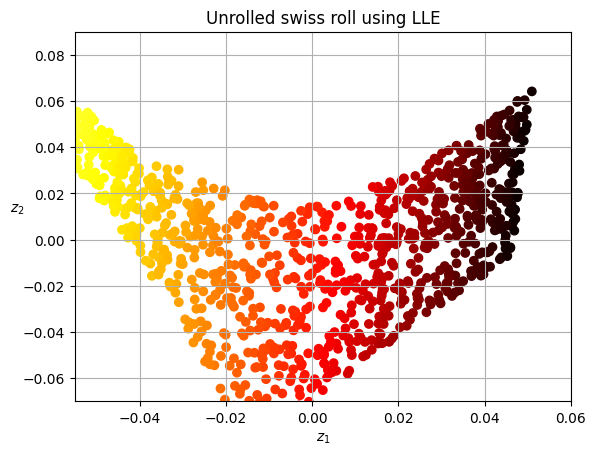

In [43]:
# Figure 8–10

plt.scatter(X_unrolled[:,0 ], X_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)

plt.title("Unrolled swiss roll using LLE")
plt.show()

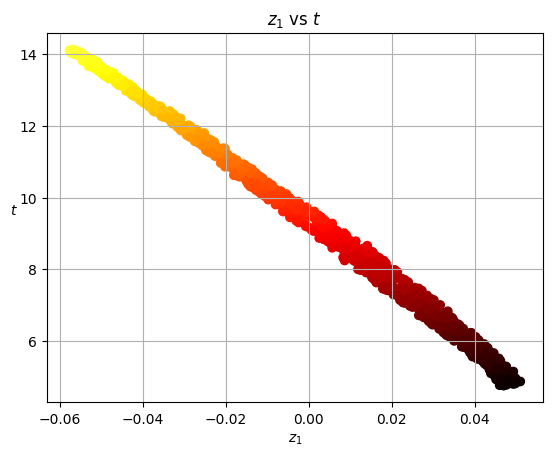

In [45]:
# extra code – shows how well correlated z1 is to t: LLE worked fine
plt.title("$z_1$ vs $t$")
plt.scatter(X_unrolled[:, 0], t, c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$t$", rotation=0)
plt.grid(True)
plt.show()

>The variable t is a 1D NumPy array containing the position of each
instance along the rolled axis of the Swiss roll. We don’t use it in this
example, but it can be used as a target for a nonlinear regression task

2) The resulting 2D dataset is shown in Figure 8-10. As you can see, the Swiss
roll is completely unrolled, and the distances between instances are locally well preserved. However, distances are not preserved on a larger scale: the
unrolled Swiss roll should be a rectangle, not this kind of stretched and
twisted band. Nevertheless, LLE did a pretty good job of modeling the
manifold.

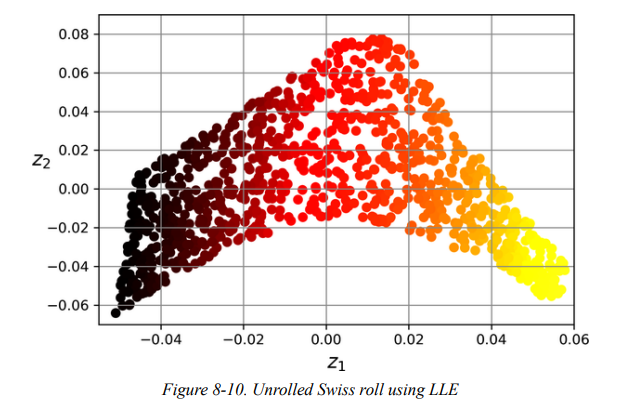

3) LLE  working:

> for each training instance x^(i) , the algorithm
identifies its k-nearest neighbors (in the preceding code k = 10), then tries to
reconstruct x^(i) as a linear function of these neighbors. More specifically, it
tries to find the weights w such that the squared distance between x^(i) and
$$ \sum_{j=1}^{m} w_{i,j} x_{j} $$
is as small as possible, assuming w = 0 if x^(j) is not one of the k-nearest neighbors of x^(i) . Thus the first step of LLE is the constrained
optimization problem described in Equation 8-4, where W is the weight
matrix containing all the weights w_(i,j) . The second constraint simply
normalizes the weights for each training instance x^(i).

1. LLE step 1: linearly modeling local relationships
$$
\hat{W} = \arg\min_W \sum_{i=1}^{m} \left( x^{(i)} - \sum_{j=1}^{m} w_{i,j} x^{(j)} \right)^2
$$

2. keeping the
weights fixed and finding the optimal position of the instances’ images in
the low-dimensional space. Note that Z is the matrix containing all z^(i).

LLE step 2: reducing dims while preserving relationships
$$
\hat{Z} = \arg\min_Z \sum_{i=1}^{m} \left( z^{(i)} - \sum_{j=1}^{m} \hat{w}_{i,j} z^{(j)} \right)^2
$$


4) conclusion :
Scikit-Learn’s LLE implementation has the following computational
complexity: O(m log(m)n log(k)) for finding the k-nearest neighbors,
O(mnk^3 ) for optimizing the weights, and O(dm^2 ) for constructing the lowdimensional representations. Unfortunately, the m^2 in the last term makes
this algorithm scale poorly to very large datasets.

As you can see, LLE is quite different from the projection techniques, and
it’s significantly more complex, but it can also construct much better lowdimensional representations, especially if the data is nonlinear.




# Other Dims reduction techniques: (via scikit-learn)

1) sklearn.manifold.MDS :
> Multidimensional scaling (MDS) reduces dimensionality while trying to
preserve the distances between the instances. Random projection does
that for high-dimensional data, but it doesn’t work well on lowdimensional data.

2) sklearn.manifold.Isomap
>Isomap creates a graph by connecting each instance to its nearest
neighbors, then reduces dimensionality while trying to preserve the
geodesic distances between the instances. The geodesic distance
between two nodes in a graph is the number of nodes on the shortest
path between these nodes.


3) sklearn.manifold.TSNE
> t-distributed stochastic neighbor embedding (t-SNE) reduces
dimensionality while trying to keep similar instances close and
dissimilar instances apart. It is mostly used for visualization, in
particular to visualize clusters of instances in high-dimensional space.

4) sklearn.discriminant_analysis.LinearDiscriminantAnalysis
> Linear discriminant analysis (LDA) is a linear classification algorithm
that, during training, learns the most discriminative axes between the
classes. These axes can then be used to define a hyperplane onto which
to project the data. The benefit of this approach is that the projection
will keep classes as far apart as possible, so LDA is a good technique to
reduce dimensionality before running another classification algorithm
(unless LDA alone is sufficient).

5) 
Figure 8-11 shows the results of MDS, Isomap, and t-SNE on the Swiss
roll. MDS manages to flatten the Swiss roll without losing its global
curvature, while Isomap drops it entirely. Depending on the downstream
task, preserving the large-scale structure may be good or bad. t-SNE does a
reasonable job of flattening the Swiss roll, preserving a bit of curvature, and
it also amplifies clusters, tearing the roll apart. Again, this might be good or
bad, depending on the downstream task.

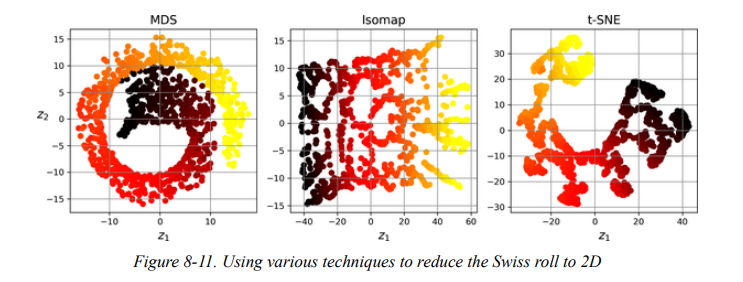

In [46]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, normalized_stress=False, random_state=42)
X_reduced_mds = mds.fit_transform(X_swiss)

In [47]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_swiss)

In [48]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X_swiss)

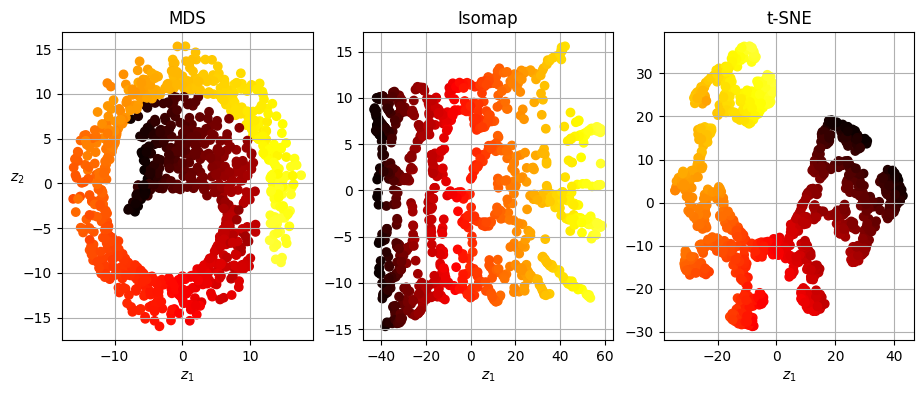

In [49]:
# extra code – this cell generates and saves Figure 8–11

titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.show()